# **Correlation Plot and Correlation Matrix**


Correlation is a statistical measure that quantifies the degree of association or relationship between two variables. It assesses how changes in one variable correspond to changes in another, indicating whether and how they tend to move together. The correlation coefficient, typically ranging from -1 to 1, summarizes the strength and direction of the relationship: a positive value signifies a positive correlation (both variables increase or decrease together), a negative value indicates a negative correlation (one variable increases while the other decreases), and zero implies no linear correlation. Correlation does not imply causation, meaning that even if two variables are correlated, it does not necessarily mean that one causes the other to change.

for this exercise, we will use the df from https://www.kaggle.com/datasets/rishisharma/churn-dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/lucarugiu/Desktop/Git_portfolio/Correlation/churn_data.csv', sep = ',')
df.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


### Explorative Data analysis

In [5]:
df.columns
df.describe() # Distribution of Numerical Variables

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


### Cleaning and preparing Data

In [9]:

df[df.credit_score < 300]
df = df[df.credit_score >= 300]

# Removing NaN
df.isna().any()
df.isna().sum()
df = df.drop(columns = ['credit_score', 'rewards_earned'])


df2 = df[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

df2=df2.drop(columns = ['housing', 'payment_type',
                         'registered_phones', 'zodiac_sign'])


In [10]:
df2.head()

,is_referred,app_downloaded,web_user,app_web_user,ios_user,android_user,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,is_referred
1,1,1,1,1,1,0,0,0,0,0,0,0,1
2,0,1,0,0,0,1,0,0,0,0,1,0,0
3,1,1,0,0,0,1,0,0,0,0,0,0,1
5,0,1,1,1,0,1,0,0,0,0,0,0,0
6,0,1,0,0,0,1,0,0,0,0,0,0,0


### Correlation with Response Variable
First thing, we want to understand if any of the features correlate with our response variable

<AxesSubplot:title={'center':'Correlation with Response variable'}>

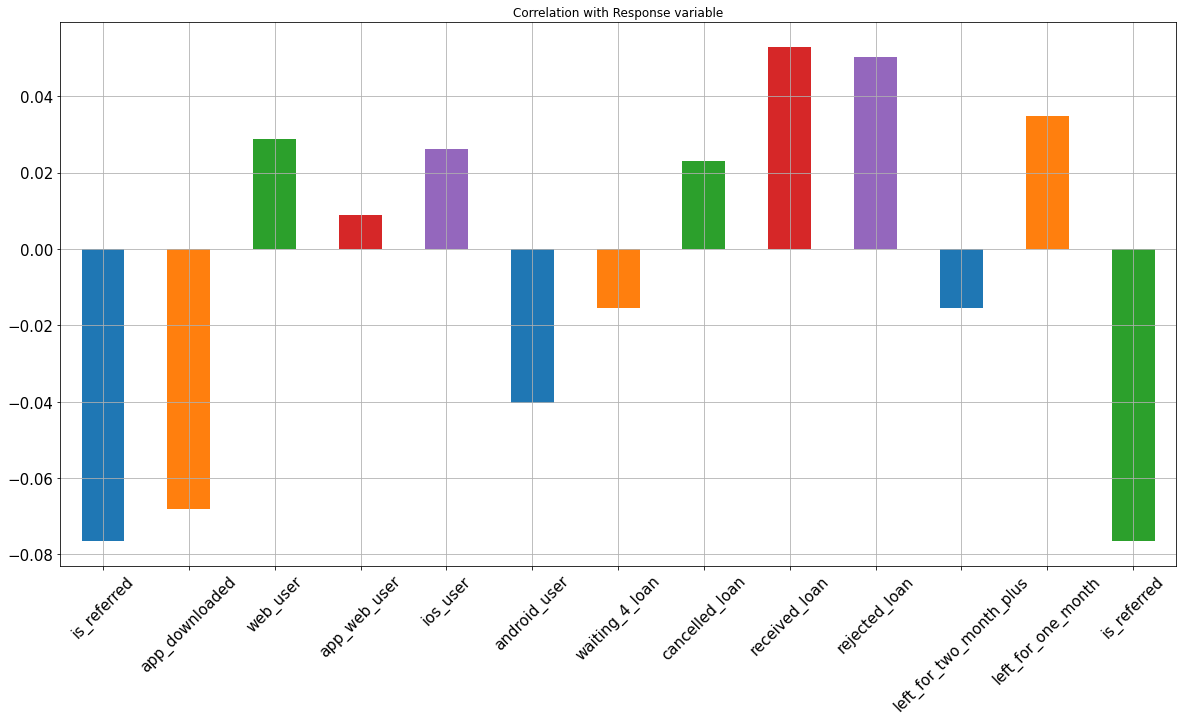

In [14]:
color = tuple(["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"])
df2.corrwith(df.churn).plot.bar(figsize=(20, 10),
                                title='Correlation with Response variable',
                                fontsize=15, rot=45,
                                grid=True, color=color)


Finally, we use the correlation matrix to identify where correlation happens.
We can see that our response variable is_referred has a higher correlation with app_downloaded and web_user

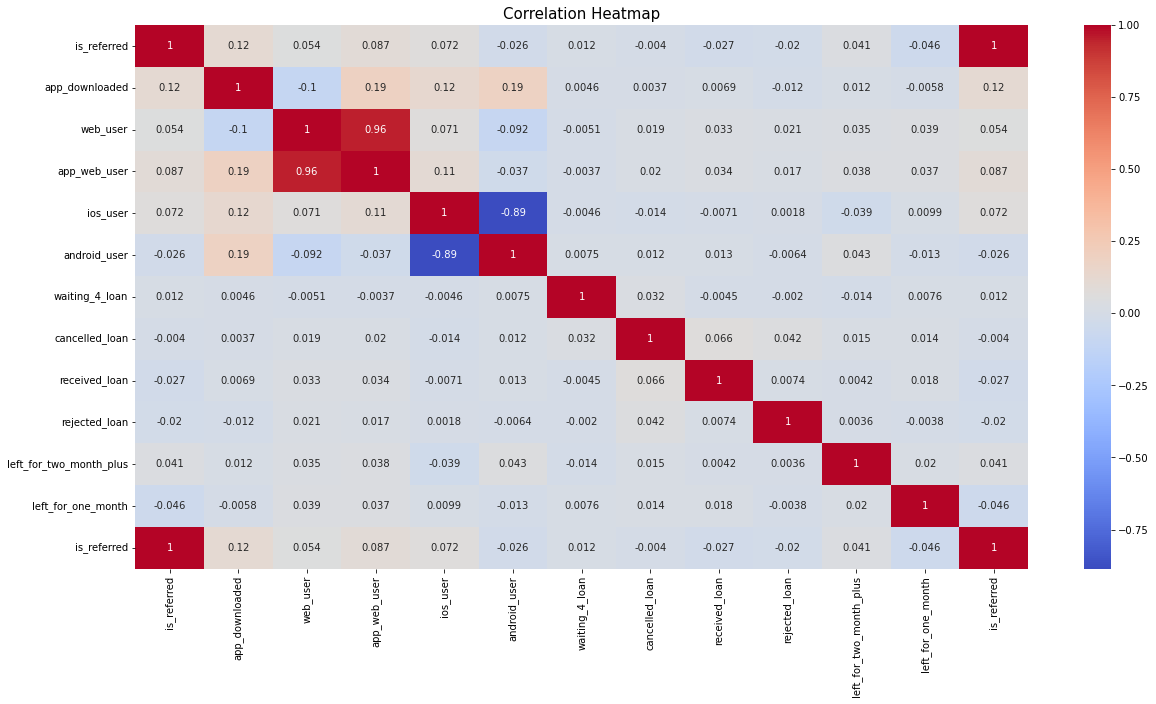

In [17]:
plt.figure(figsize=(20, 10))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()